## Libs Imports

In [ ]:
import random

In [2]:
import pandas as pd 
import json 
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Created Sample

In [ ]:
# f = open('spotfy_playlists.json')
# js = f.read()
# f.close()
# data_playlist = json.loads(js)['playlists']
# sample = random.sample(data_playlist,40)
# with open('data_spotfy.json', 'w') as f:
#     json.dump(sample, f)

##Import data and create Graph

In [3]:
f = open('/content/data_spotfy.json')
js = f.read()
f.close()
sample = json.loads(js)

In [4]:
graph = nx.Graph()
for playlist in sample:
  subgraph = set()
  for music in playlist['tracks']:
    graph.add_node(music['artist_name'])
    subgraph.add(music['artist_name'])

  for node_orig, node_target in combinations(list(subgraph),2):
    if graph.has_edge(node_orig, node_target):
      graph[node_orig][node_target]['weight'] += 1

    else:
      graph.add_edge(node_orig, node_target, weight=1,playlist_ids=playlist['pid'])
biggest_componet  = None
for component in nx.connected_components(graph):
    print(len(component))
    if biggest_componet is None:
      biggest_componet = list(component)
    elif len(biggest_componet) < len(component):
      biggest_componet = list(component)
graph = graph.subgraph(biggest_componet)

417
7
4
7
6


In [7]:
graph.number_of_nodes()

417

In [8]:
graph.number_of_edges()

11703

## Global metrics

### Eccentricity, Diameter, Periphery, Radius and Center.

In [6]:
nx.eccentricity(graph)

{'2 Chainz': 3,
 '21 Savage': 3,
 '2Pac': 3,
 '6LACK': 3,
 'A Day To Remember': 3,
 'A$AP Rocky': 3,
 'AC/DC': 3,
 'AJR': 3,
 'AWOLNATION': 2,
 'Adele': 2,
 'Aerosmith': 3,
 'Akon': 3,
 'Alan Walker': 3,
 'Alessia Cara': 3,
 'Alex & Sierra': 3,
 'Alex Aiono': 4,
 'Alex Da Kid': 3,
 'Alex Newell': 3,
 'Alice Kristiansen': 4,
 'Alicia Keys': 3,
 'Alina Baraz': 4,
 'Alvaro Soler': 4,
 'Amber Run': 4,
 'American Authors': 4,
 'Aminé': 3,
 'Andreas Moss': 3,
 'Andrew Belle': 4,
 'Angel Olsen': 4,
 'Arcade Fire': 4,
 'Arctic Monkeys': 4,
 'Ariana Grande': 3,
 'Atlas Genius': 4,
 'Austin': 3,
 'Austin Awake': 3,
 'Avicii': 3,
 'Avril Lavigne': 4,
 'Bad Company': 4,
 'Banks': 4,
 'Bear Hands': 4,
 'Beastie Boys': 3,
 'Bebe Rexha': 3,
 'Benjamin Francis Leftwich': 4,
 'Beyoncé': 3,
 'Big Data': 4,
 'Big Sean': 3,
 'Big Wild': 4,
 'Billy Joel': 4,
 'Bingx': 3,
 'Birdman': 3,
 'Black Coast': 3,
 'Blake Shelton': 3,
 'Bleachers': 4,
 'Breaking Benjamin': 3,
 'Brett Young': 3,
 'Broods': 4,
 'Brook

In [5]:
nx.diameter(graph)

4

In [9]:
nx.periphery(graph)

['Lynyrd Skynyrd',
 'Bad Company',
 'Styx',
 'Eagles',
 'Queen',
 'Buffalo Springfield',
 'The Who',
 'Tom Petty',
 'The Rolling Stones',
 'George Thorogood & The Destroyers',
 'Billy Joel',
 'Foreigner',
 'Jeff Gutt',
 'The Hit Co.',
 'Carl Wave',
 'Purity Ring',
 'ODESZA',
 'Banks',
 'Broods',
 'Daft Punk',
 'Grace Pitts',
 'Alina Baraz',
 'R E L',
 'Recable',
 'Tourist',
 'Catching Flies',
 'C418',
 'Shiny Toy Guns',
 'The Chain Gang Of 1974',
 'ZHU',
 'Savoir Adore',
 'Singularity',
 'Andrew Belle',
 'Hippie Sabotage',
 'Example',
 'Late Night Alumni',
 'Mark Norman',
 'Clams Casino',
 'Ryan Dolan',
 'Meg Myers',
 'Alice Kristiansen',
 'Hundred Waters',
 'Grimes',
 'Frou Frou',
 'Pr0files',
 'Night Riots',
 'Groove Armada',
 'Lewis Del Mar',
 'Tycho',
 'Avril Lavigne',
 'Seanloui',
 'Florence + The Machine',
 'Dhruva Aliman',
 'James Horner',
 'Yeah Yeah Yeahs',
 'MOVEMENT',
 'Shy Girls',
 'SOHN',
 'Rosie Lowe',
 'Phantogram',
 'Thomas Newman',
 'Halloween Masters',
 'Washed Out',


In [10]:
nx.radius(graph)

2

In [11]:
nx.center(graph)

['Adele',
 'Lorde',
 'Lil Wayne',
 'Tim McGraw',
 'AWOLNATION',
 'Ed Sheeran',
 'Luke Bryan']

### Degree, Closeness, Betweenness and Eigenvector Centrality

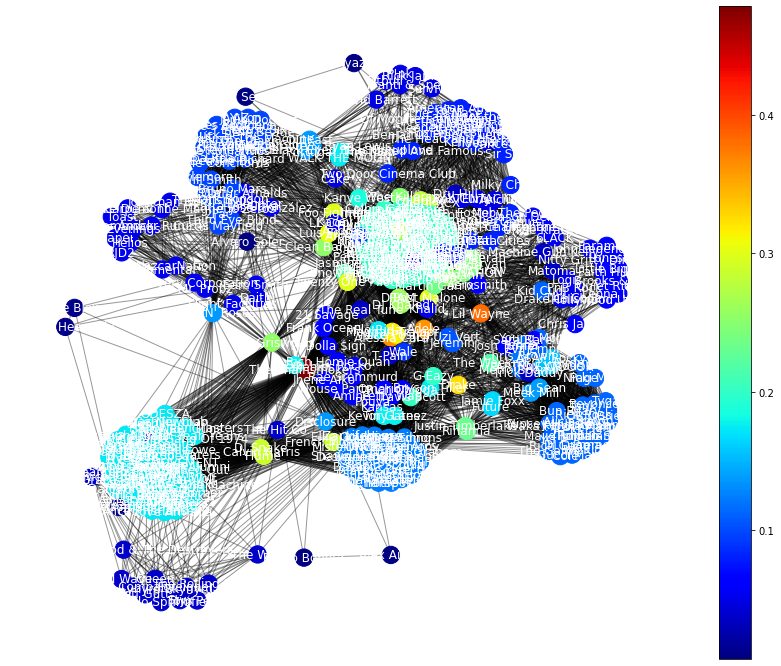

In [18]:
# the degree centrality  of network
fig, ax = plt.subplots(1,1,figsize=(15,12))
pos = nx.spring_layout(graph,seed=123456789,k=0.5)
degree_dict = dict(nx.degree_centrality(graph))
color = list(degree_dict.values())
nx.draw_networkx_edges(graph,
                       pos=pos,
                       alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(graph,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)
nx.draw_networkx_labels(graph, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [19]:
print("Top 10 nodes per degree centrality")
sorted(list(degree_dict.items()),key=lambda x:x[1],reverse=True)[:10]

Top 10 nodes per degree centrality 


[('The Chainsmokers', 0.47836538461538464),
 ('Snakehips', 0.47836538461538464),
 ('Lil Wayne', 0.3822115384615385),
 ('Alessia Cara', 0.3629807692307693),
 ('Adele', 0.3605769230769231),
 ('Drake', 0.3245192307692308),
 ('Mike Posner', 0.31490384615384615),
 ('Meghan Trainor', 0.31490384615384615),
 ('Luis Fonsi', 0.30528846153846156),
 ('Post Malone', 0.3004807692307693)]

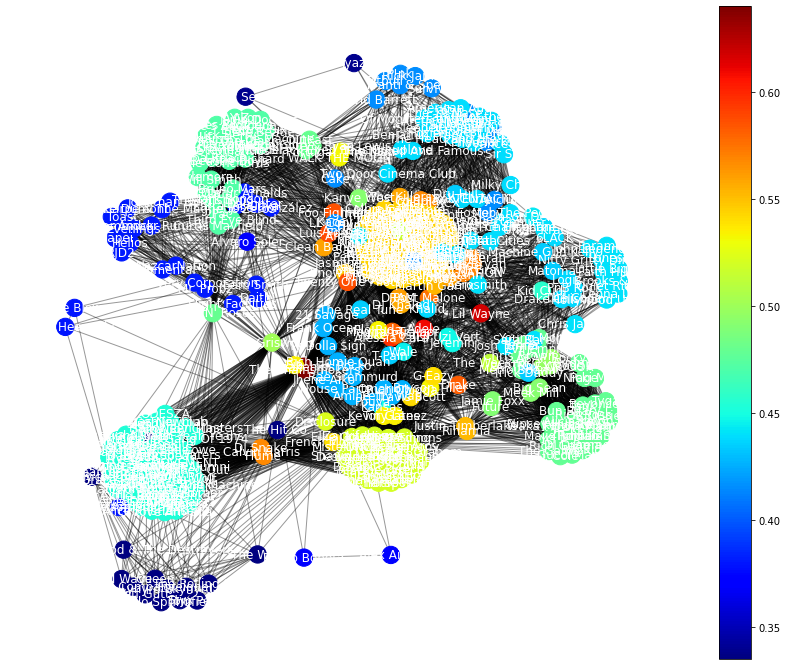

In [14]:
# the closeness centrality 
fig, ax = plt.subplots(1,1,figsize=(15,12))
pos = nx.spring_layout(graph,seed=123456789,k=0.5)
closeness_dict = dict(nx.closeness_centrality(graph))
color = list(closeness_dict.values())
nx.draw_networkx_edges(graph,
                       pos=pos,
                       alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(graph,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)
nx.draw_networkx_labels(graph, pos=pos,
                        font_color='white', ax=ax)

plt.axis("off")
plt.colorbar(nodes)
# plt.savefig('closeness_centrality.png', transparent=True,dpi=300)
plt.show()

In [15]:
print("Top 10 nodes per closeness centrality ")
sorted(list(closeness_dict.items()),key=lambda x:x[1],reverse=True)[:10]

Top 10 nodes per closeness centrality 


[('The Chainsmokers', 0.64),
 ('Snakehips', 0.64),
 ('Lil Wayne', 0.6181277860326895),
 ('Adele', 0.6099706744868035),
 ('Alessia Cara', 0.5959885386819485),
 ('Luis Fonsi', 0.5884016973125884),
 ('Twenty One Pilots', 0.5867418899858956),
 ('Foo Fighters', 0.5859154929577465),
 ('Drake', 0.5818181818181818),
 ('Mike Posner', 0.5793871866295265)]

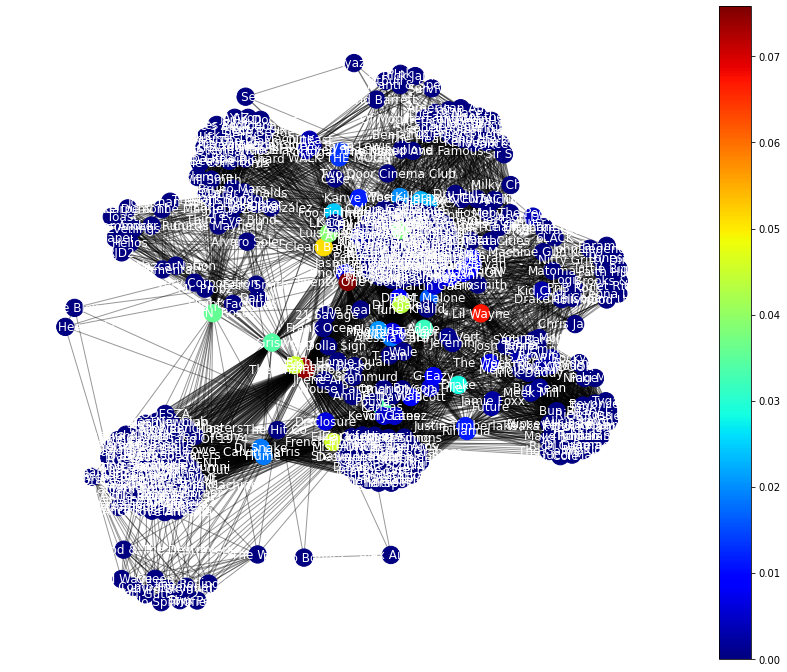

In [14]:
# the betwenness centrality 
fig, ax = plt.subplots(1,1,figsize=(15,12))
pos = nx.spring_layout(graph,seed=123456789,k=0.5)
betweenness_dict = dict(nx.betweenness_centrality(graph))
color = list(betweenness_dict.values())
nx.draw_networkx_edges(graph,
                       pos=pos,
                       alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(graph,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)
nx.draw_networkx_labels(graph, pos=pos,
                        font_color='white', ax=ax)
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=300)
plt.show()

In [15]:
print("Top 10 nodes per betwenness centrality ")
sorted(list(betweenness_dict.items()),key=lambda x:x[1],reverse=True)[:10]

Top 10 nodes per betwenness centrality 


[('Twenty One Pilots', 0.07580123266558665),
 ('The Chainsmokers', 0.07419938684931444),
 ('Snakehips', 0.07419938684931444),
 ('Lil Wayne', 0.06699225847786745),
 ('Clean Bandit', 0.05104473482572417),
 ('French Montana', 0.045601276897854266),
 ('Sia', 0.04500875206042029),
 ('DJ Khaled', 0.043711277123558635),
 ('Luis Fonsi', 0.039023210922770606),
 ('Eminem', 0.03792889243745329)]

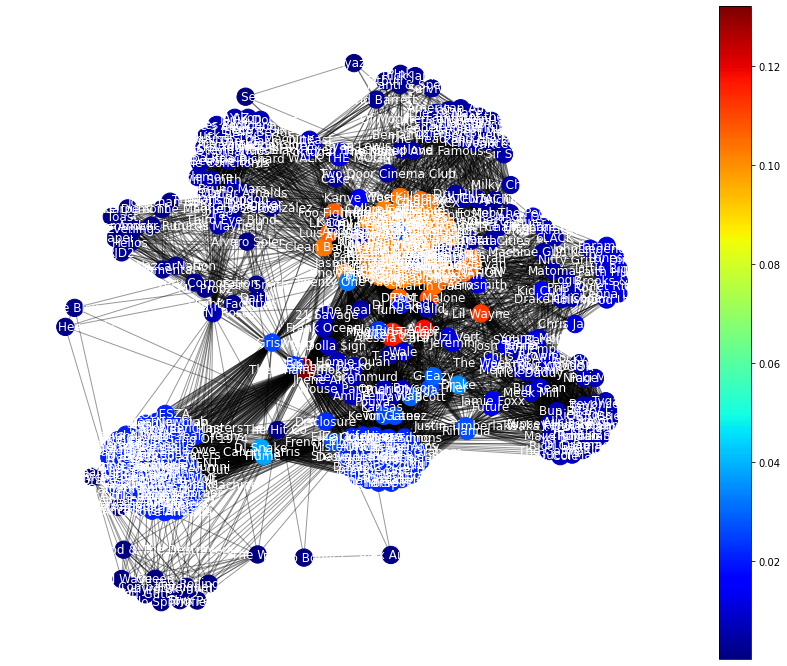

In [16]:
# the eigenvector centrality 
fig, ax = plt.subplots(1,1,figsize=(15,12))
pos = nx.spring_layout(graph,seed=123456789,k=0.5)
eigenvector_dict = dict(nx.eigenvector_centrality(graph))
color = list(eigenvector_dict.values())
nx.draw_networkx_edges(graph,
                       pos=pos,
                       alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(graph,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)
nx.draw_networkx_labels(graph, pos=pos,
                        font_color='white', ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=300)
plt.show()

In [17]:
print("Top 10 nodes per eigenvector centrality ")
sorted(list(eigenvector_dict.items()),key=lambda x:x[1],reverse=True)[:10]

Top 10 nodes per eigenvector centrality 


[('The Chainsmokers', 0.13206748062127746),
 ('Snakehips', 0.13206748062127746),
 ('Adele', 0.11831272367089857),
 ('Alessia Cara', 0.11775483619450669),
 ('Mike Posner', 0.11555979023858493),
 ('Meghan Trainor', 0.11555979023858493),
 ('Lil Wayne', 0.11161654624220496),
 ('Post Malone', 0.1083379232657719),
 ('Luis Fonsi', 0.10641480713707265),
 ('Foo Fighters', 0.10637076117653123)]

## Bivariate Analysis

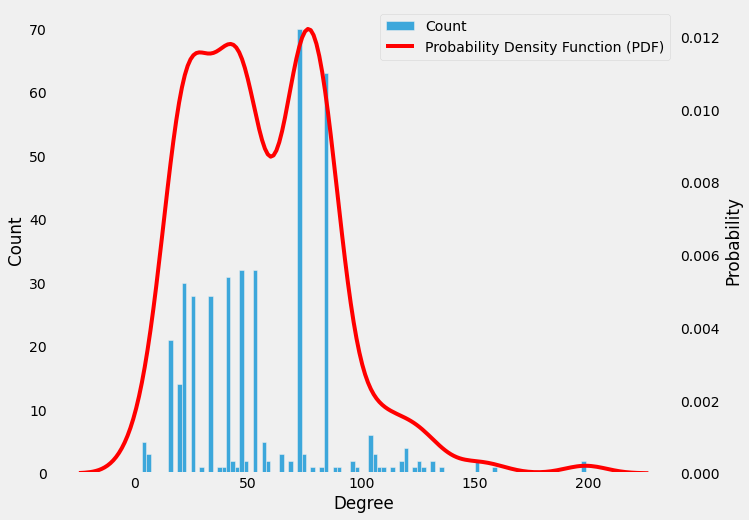

In [26]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=100,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

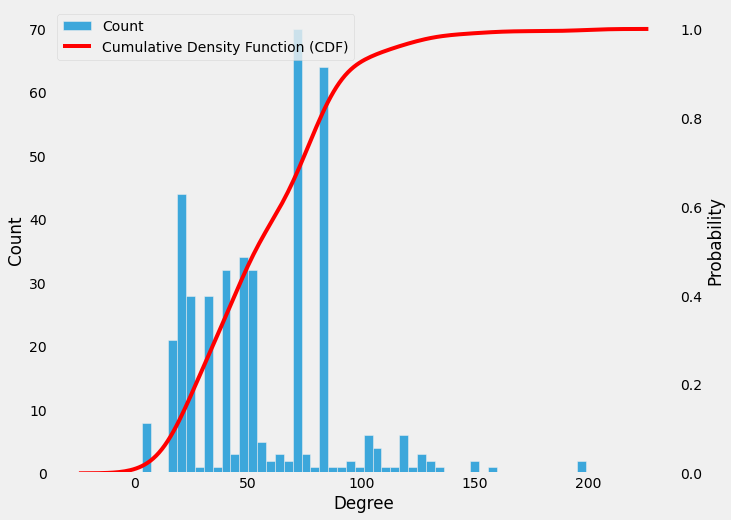

In [27]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=50,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Multivariate analysis

In [20]:
bc = pd.Series(nx.betweenness_centrality(graph))
dc = pd.Series(nx.degree_centrality(graph))
ec = pd.Series(nx.eigenvector_centrality(graph))
cc = pd.Series(nx.closeness_centrality(graph))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.022967,0.281250,0.105165,0.568306
1,0.074199,0.478365,0.132067,0.640000
2,0.000000,0.201923,0.102550,0.543791
3,0.016384,0.300481,0.108338,0.574586
4,0.000000,0.201923,0.102550,0.543791


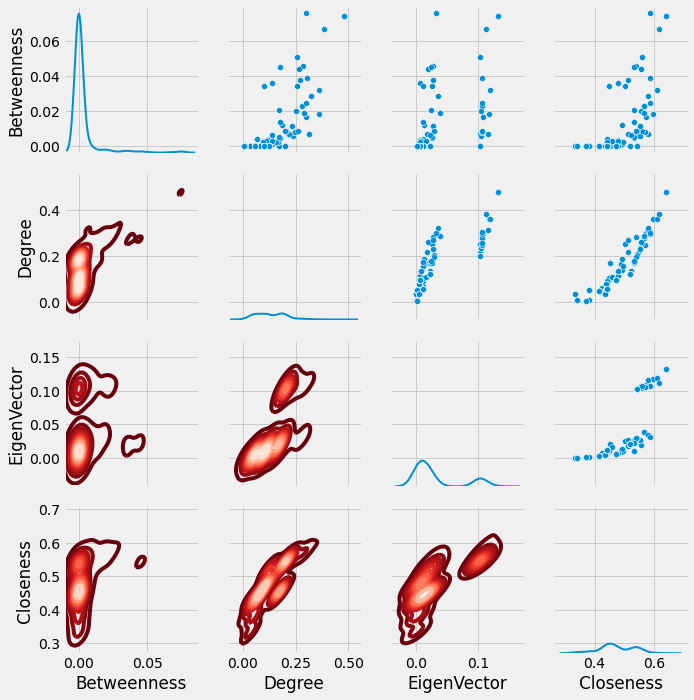

In [21]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

## Network Decomposition Analysis

In [22]:
set([v for k,v in nx.core_number(graph).items()])

{3, 4, 5, 15, 16, 20, 22, 25, 26, 34, 41, 47, 52, 72, 84}

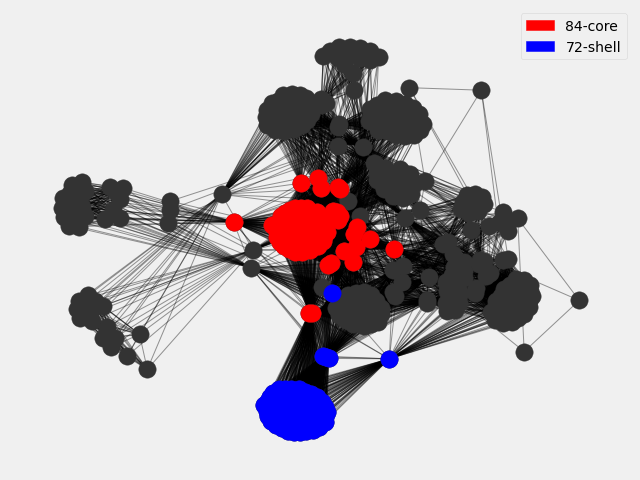

In [23]:
# the degree of network
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
graph_core_72 = nx.k_shell(graph, 72)
graph_core_84 = nx.k_core(graph, 84)

# layout position
pos = nx.spring_layout(graph,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(graph,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(graph,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(graph_core_72,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(graph_core_84,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='84-core')
blue_patch = mpatches.Patch(color='blue', label='72-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

## Export to Gephi

In [ ]:
nx.write_graphml(graph,'spotify_graph.graphml')